In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# Introduction

## Définitions

Nous allons commencer par quelques définitions :

**Définition 1 :** Une image (en nuances de gris) $M_{xy}$ est une matrice de $M_{n, p}(R)$.

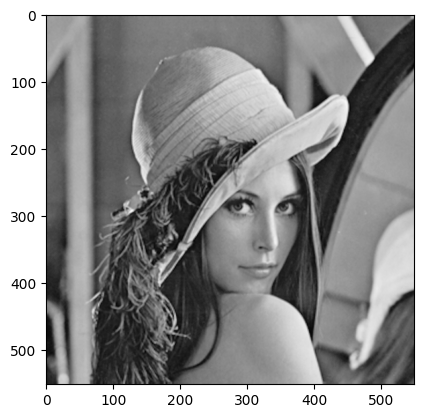

In [2]:
M_xy = np.array(Image.open("../data/lena.png").convert("L"))
plt.imshow(M_xy, cmap="gray")

In [3]:
print("Dimension de l'image :", M_xy.shape)

Dimension de l'image : (552, 550)


**Définition 2 :** Le gradient d'une image $M_{xy}$ est une matrice $G_{xy}$ de $M_{n, p}(R)$ telle que :

$$G_{xy} = \begin{pmatrix} G_x \\ G_y \end{pmatrix} = \begin{pmatrix} \frac{\partial M_{xy}}{\partial x} \\ \frac{\partial M_{xy}}{\partial y} \end{pmatrix}$$

Le gradient définit *la direction* de **la plus forte variation de l'intensité lumineuse dans l'image**.

**Définition 3** : Le module du gradient d'une image $M_{xy}$ est un scalaire $f_{xy}$ défini par :

$$f_{xy} = \sqrt{G_x^2 + G_y^2}$$

Le module du gradient définit *l'intensité* de **la plus forte variation de l'intensité lumineuse dans l'image**.

## Méthodologie de la détection de contours

A partir de ces définitions, nous pouvons définir un contour comme étant **la frontière entre deux régions d'intensité lumineuse différentes**. 

Ainsi, pour détecter les contours d'une image, il faut détecter les points où l'intensité lumineuse varie le plus. Pour cela, il faut déterminer les points où le module du gradient est maximal.

Malheureusement, le gradient d'une image n'est pas calculable explicitement. Nous utiliserons donc des approximations du gradient à partir de **matrices de convolution**.

[Eventuellement à faire : justifier en quoi les matrices de convolution sont des approximations du gradient]

**Définition 4 :** Soit $M_{xy}$ une image et $K$ une matrice de convolution. On appelle convolution de $M_{xy}$ par $K$ l'image $M'_{xy}$ définie par :

$$M'_{xy} = \sum_{i=0}^{n-1} \sum_{j=0}^{m-1} K_{ij} M_{x+i,y+j}$$

In [4]:
def convolution(M, K):
    # Get dimensions of the input image and the kernel
    m, n = M.shape
    k, l = K.shape

    # Initialize the result matrix
    result = np.zeros((m, n))

    # Perform convolution
    for i in range(m):
        for j in range(n):
            # Iterate over the kernel
            for x in range(k):
                for y in range(l):
                    # Check bounds to avoid indexing errors
                    if 0 <= i + x < m and 0 <= j + y < n:
                        result[i, j] += K[x, y] * M[i + x, j + y]

    return result

La littérature a identifié plusieurs matrices de convolution permettant d'approximer le gradient d'une image. Nous allons étudier les matrices dites de Sobel.

**Définition 5 :** On appelle matrices de Sobel les matrices de convolution $S_x$ et $S_y$ définies par :

$$S_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix} \quad \text{et} \quad S_y = \begin{pmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{pmatrix}$$

In [5]:
Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Sy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
print(f"Sx = {Sx}\n")
print(f"Sy = {Sy}")

Sx = [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sy = [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


L'image $M'_{xy}$ obtenue par convolution de $M_{xy}$ par $S_x$ (resp. $S_y$) est appelée image de Sobel horizontale (resp. verticale).

Ainsi, le gradient d'une image $M_{xy}$ peut être approximé par :

$$G_{xy} \approx \begin{pmatrix} M'_{xy} \\ M'_{xy} \end{pmatrix} = \begin{pmatrix} S_x \ast M_{xy} \\ S_y \ast M_{xy} \end{pmatrix}$$

où $\ast$ désigne l'opération de convolution.

In [6]:
Gx = convolution(M_xy, Sx)
Gy = convolution(M_xy, Sy)

On peut ainsi calculer le module de $G_{xy}$ :

In [7]:
module_Gxy = np.sqrt(Gx**2 + Gy**2)

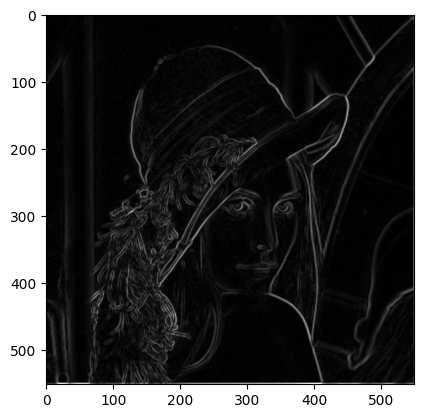

In [8]:
plt.imshow(module_Gxy, cmap="gray")